<a href="https://colab.research.google.com/github/didlaak/python/blob/main/ex04_%EC%86%90%EA%B8%80%EC%94%A8_%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 손글씨 데이터를 가져와서 분석해보기
# 0 ~ 9 까지의 숫자

In [ ]:
from tensorflow.keras.datasets import mnist
((X_train,y_train),(X_test,y_test)) = mnist.load_data()


11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
# 데이터 갯수, 세로크기, 가로크기
X_train.shape

(60000, 28, 28)

In [ ]:
# 0 > 검은색
# 255 > 흰색
# 28 * 28 픽셀로 이루어져있음
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

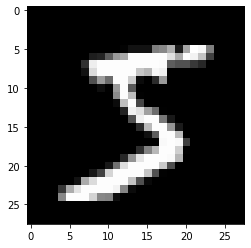

In [ ]:
# 데이터 확인
import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap ='gray')
plt.show()

In [ ]:
# 이미지에서 해주면 좋은 전처리
# 조금더 효율적인 방법
# 값이 0 ~ 255(정수)로 분포
# 분산이 크기때문에 계산상에 오류가 발생할 수 있음
# 적은 범위의 숫자로 표현 > 0 ~ 1(실수)

X_train = X_train.astype('float') / 255
X_test = X_test.astype('float') / 255


In [ ]:
# Dense의 한계
# 1차원만 학습 가능 -> 데이터가 모양을 잃어 모양이 가지는 의미가 사라짐
X_train = X_train.reshape((60000, 28*28))
X_test = X_test.reshape((10000, 28*28))



In [ ]:
X_train.shape

(60000, 784)

In [ ]:
# 다중분류
# 다중분류시에는 y데이터에 원핫 인코딩
import pandas as pd
y_train = pd.get_dummies(y_train)
y_test = pd.get_dummies(y_test)

In [ ]:
from tensorflow.keras import Sequential # 딥러닝 모델의 뼈대
from tensorflow.keras.layers import InputLayer, Dense

model1 = Sequential()
# 모델 설계
# relu가 대체로 잘 나오지만 비교하기 위해서 sigmoid를 사용해보자

model1.add(Dense(units = 512, activation = 'sigmoid', input_dim=784)) 

# 학습방법 설정
model1.add(Dense(units = 34, activation = 'sigmoid')) 
model1.add(Dense(units = 54, activation = 'sigmoid')) 
model1.add(Dense(units = 26, activation = 'sigmoid')) 

model1.add(Dense(units = 10, activation = 'softmax')) 

model1.compile(loss ='categorical_crossentropy', 
               optimizer ='SGD', 
               metrics=['accuracy'])
#model1.fit(X_train,y_train, epochs = 20, validation_data = (X_test,y_test))

In [ ]:
model1.fit(X_train,y_train, epochs = 20, validation_data = (X_test,y_test))

Epoch 1/20
1875/1875 [==============================] - 8s 4ms/step - loss: 2.3054 - accuracy: 0.1116 - val_loss: 2.3004 - val_accuracy: 0.1135
Epoch 2/20
1875/1875 [==============================] - 8s 4ms/step - loss: 2.3007 - accuracy: 0.1128 - val_loss: 2.3000 - val_accuracy: 0.1028
Epoch 3/20
1875/1875 [==============================] - 9s 5ms/step - loss: 2.2999 - accuracy: 0.1132 - val_loss: 2.2990 - val_accuracy: 0.1135
Epoch 4/20
1875/1875 [==============================] - 8s 4ms/step - loss: 2.2990 - accuracy: 0.1142 - val_loss: 2.2981 - val_accuracy: 0.1135
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 2.2977 - accuracy: 0.1143 - val_loss: 2.2961 - val_accuracy: 0.1135
Epoch 6/20
1875/1875 [==============================] - 8s 4ms/step - loss: 2.2958 - accuracy: 0.1191 - val_loss: 2.2944 - val_accuracy: 0.1135
Epoch 7/20
1875/1875 [==============================] - 8s 4ms/step - loss: 2.2931 - accuracy: 0.1213 - val_loss: 2.2909 - val_accuracy:

activation : sigmoid - 학습을 못함

optimizer : SGD - 학습을 느리게, 다르게 함

In [ ]:
from tensorflow.keras import Sequential # 딥러닝 모델의 뼈대
from tensorflow.keras.layers import InputLayer, Dense

model2 = Sequential()
# 모델 설계
# relu가 대체로 잘 나오지만 비교하기 위해서 sigmoid를 사용해보자

model2.add(Dense(units = 512, activation = 'relu', input_dim=784)) 

# 학습방법 설정
model2.add(Dense(units = 34, activation = 'relu')) 
model2.add(Dense(units = 54, activation = 'relu')) 
model2.add(Dense(units = 26, activation = 'relu')) 

model2.add(Dense(units = 10, activation = 'softmax')) 

model2.compile(loss ='categorical_crossentropy', 
               optimizer ='SGD', 
               metrics=['accuracy'])
model2.fit(X_train,y_train, epochs = 20, validation_data = (X_test,y_test))

Epoch 1/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.7158 - accuracy: 0.7803 - val_loss: 0.2926 - val_accuracy: 0.9157
Epoch 2/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2418 - accuracy: 0.9293 - val_loss: 0.2069 - val_accuracy: 0.9406
Epoch 3/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1775 - accuracy: 0.9484 - val_loss: 0.1546 - val_accuracy: 0.9529
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1392 - accuracy: 0.9603 - val_loss: 0.1284 - val_accuracy: 0.9613
Epoch 5/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1130 - accuracy: 0.9677 - val_loss: 0.1252 - val_accuracy: 0.9623
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0935 - accuracy: 0.9725 - val_loss: 0.1061 - val_accuracy: 0.9680
Epoch 7/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0796 - accuracy: 0.9762 - val_loss: 0.0999 - val_accuracy:

In [ ]:
from tensorflow.keras import Sequential # 딥러닝 모델의 뼈대
from tensorflow.keras.layers import InputLayer, Dense

model3 = Sequential()
# 모델 설계
# relu가 대체로 잘 나오지만 비교하기 위해서 sigmoid를 사용해보자

model3.add(Dense(units = 512, activation = 'sigmoid', input_dim=784)) 

# 학습방법 설정
model3.add(Dense(units = 34, activation = 'sigmoid')) 
model3.add(Dense(units = 54, activation = 'sigmoid')) 
model3.add(Dense(units = 26, activation = 'sigmoid')) 

model3.add(Dense(units = 10, activation = 'softmax')) 

model3.compile(loss ='categorical_crossentropy', 
               optimizer ='Adam', 
               metrics=['accuracy'])
model3.fit(X_train,y_train, epochs = 20, validation_data = (X_test,y_test))

Epoch 1/20
1875/1875 [==============================] - 9s 4ms/step - loss: 0.8310 - accuracy: 0.7758 - val_loss: 0.2763 - val_accuracy: 0.9337
Epoch 2/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1920 - accuracy: 0.9527 - val_loss: 0.1532 - val_accuracy: 0.9599
Epoch 3/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1199 - accuracy: 0.9688 - val_loss: 0.1301 - val_accuracy: 0.9662
Epoch 4/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0870 - accuracy: 0.9764 - val_loss: 0.1166 - val_accuracy: 0.9675
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0669 - accuracy: 0.9822 - val_loss: 0.0964 - val_accuracy: 0.9739
Epoch 6/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0514 - accuracy: 0.9858 - val_loss: 0.0866 - val_accuracy: 0.9759
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0399 - accuracy: 0.9886 - val_loss: 0.0916 - val_accuracy:

In [ ]:
from tensorflow.keras import Sequential # 딥러닝 모델의 뼈대
from tensorflow.keras.layers import InputLayer, Dense

model4 = Sequential()
# 모델 설계
# relu가 대체로 잘 나오지만 비교하기 위해서 sigmoid를 사용해보자

model4.add(Dense(units = 512, activation = 'relu', input_dim=784)) 

# 학습방법 설정
model4.add(Dense(units = 34, activation = 'relu')) 
model4.add(Dense(units = 54, activation = 'relu')) 
model4.add(Dense(units = 26, activation = 'relu')) 

model4.add(Dense(units = 10, activation = 'softmax')) 

model4.compile(loss ='categorical_crossentropy', 
               optimizer ='Adam', 
               metrics=['accuracy'])
model4.fit(X_train,y_train, epochs = 20, validation_data = (X_test,y_test))

Epoch 1/20
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2456 - accuracy: 0.9269 - val_loss: 0.1379 - val_accuracy: 0.9586
Epoch 2/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0983 - accuracy: 0.9702 - val_loss: 0.0889 - val_accuracy: 0.9740
Epoch 3/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0685 - accuracy: 0.9792 - val_loss: 0.0915 - val_accuracy: 0.9734
Epoch 4/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0530 - accuracy: 0.9832 - val_loss: 0.0750 - val_accuracy: 0.9793
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0412 - accuracy: 0.9874 - val_loss: 0.0796 - val_accuracy: 0.9784
Epoch 6/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0355 - accuracy: 0.9888 - val_loss: 0.1000 - val_accuracy: 0.9722
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0303 - accuracy: 0.9902 - val_loss: 0.0798 - val_accuracy:

In [ ]:
# 직접 적은 손글씨 인식시키기


In [ ]:
import PIL.Image as pimg
img = pimg.open('/content/num4.gif')

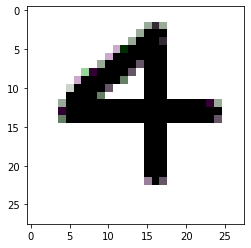

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(img)
plt.show()

In [ ]:
# 배경 검은색(0)
# 글씨 흰색(255)으로 변경하기
# 0은 255로
# 255은 0으로

In [ ]:
import numpy as np
num = np.array(img)
num

array([[251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251,
        251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251,
        251, 251],
       [251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251,
        251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251,
        251, 251],
       [251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251,
        251, 251, 153,  49, 153, 251, 251, 251, 251, 251, 251, 251, 251,
        251, 251],
       [251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251,
        251, 153,   0,   0,   0, 251, 251, 251, 251, 251, 251, 251, 251,
        251, 251],
       [251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251,
        153,   0,   0,   0,  49, 251, 251, 251, 251, 251, 251, 251, 251,
        251, 251],
       [251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 196,   6,
          0,   0,   0,   0,   0, 251, 251, 251, 251, 251, 251, 251, 251,
        251, 251],
       [25

In [ ]:
# 픽셀값 변환
num = 255 -num

In [ ]:
num.shape

(28, 28)

In [ ]:
# 차원 수정
num = num.reshape(1, 784)

In [ ]:
# 값 변경
num = num.astype('float') / 255

In [ ]:
model4.predict(num).argmax()

1/1 [==============================] - 0s 23ms/step


9

In [ ]:
# Dense를 사용한 MLP모델은 이미지 학습이 안된다

In [ ]:
# 모델 저장/ 모델 불러오기
# h5, hdf5 : 딥러닝 모델의 확장자
model4.save('./content/hand_model.h5')

In [ ]:
# 모델 불러오기
from tensorflow.keras.models import load_model
model5 = load_model('/content/content/hand_model.h5')

In [ ]:
model5.predict(num).argmax()

1/1 [==============================] - 0s 69ms/step


9

In [ ]:
# 중간 모델 저장(ModelCheckPoint) -> 좋았던 모델 저장
# 학습 중단(EarlyStopping) : 결과가 나빠지면 학습 중단
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [ ]:
# 모델 정장 경로 / 파일 이름 설정
# epch:03d : epochs를 3자리 정수로 표현
# val_accuracy:.4f : 모델의 검증 정확도를 소수점 4번째 자리까지포현하겠다
# ex) handmodel-013-0.9753.hdf5
modelpath = '/content/handmodel-{epoch:03d}-{val_accuracy:.4f}.hdf5'

In [ ]:
# ModelCheckpoint : 전보다 나아지면 저장
mcp = ModelCheckpoint(
    
    filepath = modelpath, # 저장될 경로
    monitor = 'val_accuracy',# 검증 정확도를 기준으로 나아진걸 판단
    save_best_only = True, # 개선된 결과만 저장
    verbose = 1 # 과정 출력 여부 0 -> 출력안함, 1-> 일부만 출력, 2-> 거의다 출력, 3-> 전부 출력

)


In [ ]:
# EarlyStopping : 전보다 개선되지 않으면 학습 중단
es = EarlyStopping(
    monitor = 'val_accuracy',
    patience = 5 # 전보다 개선되지 않더라도 기다릴 횟수

)

In [ ]:
from tensorflow.keras import Sequential # 딥러닝 모델의 뼈대
from tensorflow.keras.layers import InputLayer, Dense

model6 = Sequential()

model6.add(Dense(units = 512, activation = 'relu', input_dim=784)) 

# 학습방법 설정
model6.add(Dense(units = 34, activation = 'relu')) 
model6.add(Dense(units = 54, activation = 'relu')) 
model6.add(Dense(units = 26, activation = 'relu')) 

model6.add(Dense(units = 10, activation = 'softmax')) 

model6.compile(loss ='categorical_crossentropy', 
               optimizer ='Adam', 
               metrics=['accuracy'])
model6.fit(X_train,y_train, epochs = 100, validation_data = (X_test,y_test),
           callbacks = [mcp,es])

Epoch 1/100
1868/1875 [============================>.] - ETA: 0s - loss: 0.2412 - accuracy: 0.9268
Epoch 1: val_accuracy did not improve from 0.98520
1875/1875 [==============================] - 10s 4ms/step - loss: 0.2407 - accuracy: 0.9269 - val_loss: 0.1065 - val_accuracy: 0.9667
Epoch 2/100
1874/1875 [============================>.] - ETA: 0s - loss: 0.0986 - accuracy: 0.9701
Epoch 2: val_accuracy did not improve from 0.98520
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0985 - accuracy: 0.9701 - val_loss: 0.0858 - val_accuracy: 0.9736
Epoch 3/100
1868/1875 [============================>.] - ETA: 0s - loss: 0.0659 - accuracy: 0.9796
Epoch 3: val_accuracy did not improve from 0.98520
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0658 - accuracy: 0.9796 - val_loss: 0.0865 - val_accuracy: 0.9739
Epoch 4/100
1872/1875 [============================>.] - ETA: 0s - loss: 0.0506 - accuracy: 0.9844
Epoch 4: val_accuracy did not improve from 0.98520


In [ ]:
# MLP
# Dense층을 사용 - 1차원만 학습 가능-> csv,table 형식의 데이터만 학습 가능

In [ ]:
# CNN
# Convolution, Pooling, Dense층을 사용 - 다차원의 데이터 학습 가능 -> 이미지가 학습 가능
 